In [1]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train,x_test,Y_train,y_test=train_test_split((df.drop(['fold','state','communityname','highCrime'],1)),df['highCrime'],test_size=0.25)

C:\Users\adity\AppData\Local\Temp\ipykernel_9056\368804203.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train,x_test,Y_train,y_test=train_test_split((df.drop(['fold','state','communityname','highCrime'],1)),df['highCrime'],test_size=0.25)


In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5)

In [5]:
model.score(x_test,y_test)

0.9859719438877755

In [25]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_test,y_test)
scores

array([0.93, 0.98, 0.85, 0.97, 1.  ])

In [26]:
np.average(scores)

0.9460000000000001

In [27]:
 model.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [40]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)
f.close()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
y_true=y_test
y_pred=model.predict(x_test)

In [36]:
accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
accuracy

0.9438877755511023

In [44]:
with open('matrix', 'wb') as f:
     pickle.dump(cm,f)
f.close()

In [43]:
with open('acuracy', 'wb') as f:
     pickle.dump(accuracy,f)
f.close()

In [37]:
cm

array([[180,  16],
       [ 12, 291]], dtype=int64)

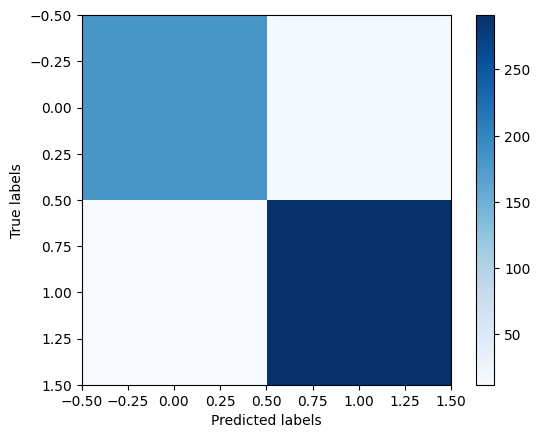

In [38]:
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()